# 원,삼각형,사각형 구분하기
* 어려운 테스트 문제를 데이터 부풀리기로 푸는 경우

In [39]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape (1).zip


In [40]:
!unzip hard_handwriting_shape.zip -d hard_handwriting_shape

Archive:  hard_handwriting_shape.zip
replace hard_handwriting_shape/test/circle/circle021.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

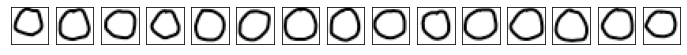

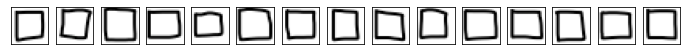

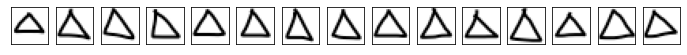

In [41]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()


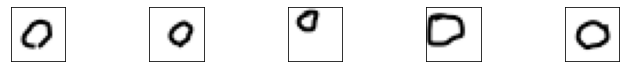

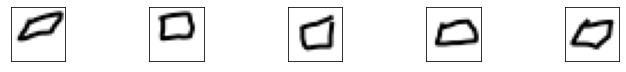

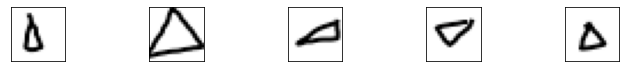

In [42]:
shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/test/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

In [43]:
import cv2
cv2.imread(fname).shape

(24, 24, 3)

- 데이터셋 생성하기

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_Datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=18,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 2.0],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [45]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 24, 24, 3)

In [51]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [52]:
count = 0
for _ in train_Datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='tri'):
    count += 1
    if count >= 30:
        break

In [49]:
!rm -rf preview

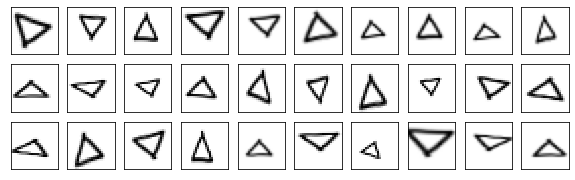

In [53]:
plt.figure(figsize=(10,3))
for i, fname in enumerate(glob.glob('preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3,10,i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

In [54]:

train_data_generator = train_Datagen.flow_from_directory(
    'hard_handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [55]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [56]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [57]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정

In [58]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [67]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               819328    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [68]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

- 모델 학습

In [69]:
hist = model.fit(
    train_data_generator,
    steps_per_epoch=15,
    epochs=300, verbose=1,
    validation_data=test_data_generator,
    validation_steps=5
)

Epoch 1/300
15/15 [==============================] - 1s 38ms/step - loss: 1.4483 - accuracy: 0.3778 - val_loss: 1.0795 - val_accuracy: 0.3333
Epoch 2/300
15/15 [==============================] - 0s 24ms/step - loss: 1.0175 - accuracy: 0.4667 - val_loss: 1.0380 - val_accuracy: 0.5333
Epoch 3/300
15/15 [==============================] - 0s 25ms/step - loss: 0.9507 - accuracy: 0.4667 - val_loss: 1.0776 - val_accuracy: 0.4000
Epoch 4/300
15/15 [==============================] - 0s 26ms/step - loss: 0.7099 - accuracy: 0.6000 - val_loss: 1.1373 - val_accuracy: 0.6667
Epoch 5/300
15/15 [==============================] - 0s 25ms/step - loss: 0.7162 - accuracy: 0.5333 - val_loss: 1.4524 - val_accuracy: 0.5333
Epoch 6/300
15/15 [==============================] - 0s 24ms/step - loss: 0.6988 - accuracy: 0.6444 - val_loss: 1.2160 - val_accuracy: 0.4667
Epoch 7/300
15/15 [==============================] - 0s 24ms/step - loss: 0.5810 - accuracy: 0.7778 - val_loss: 1.2354 - val_accuracy: 0.5333
Epoch 

- 모델 평가

In [70]:
model.evaluate(test_data_generator, steps=5)

5/5 [==============================] - 0s 8ms/step - loss: 1.9509 - accuracy: 0.8000


[1.9509398937225342, 0.800000011920929]

- 학습과정 시각화

In [71]:
y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
y_vacc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

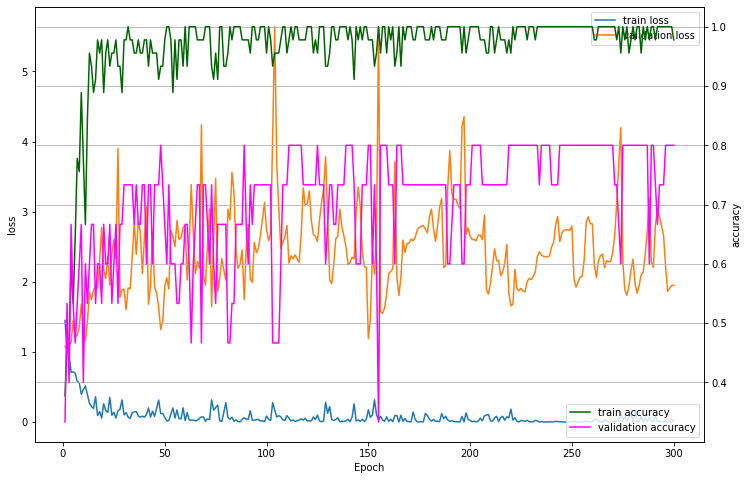

In [73]:
_, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(xs, y_loss, label='train loss')
ax0.plot(xs, y_vloss, label='validation loss')
ax0.set_ylabel('loss')
ax1.plot(xs, y_acc, c='darkgreen', label='train accuracy')
ax1.plot(xs, y_vacc, c='magenta', label='validation accuracy')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('Epoch')
ax0.legend(), ax1.legend()
plt.grid()
plt.show()

In [66]:
del model